In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
dataset = pd.read_csv("snads_dataset.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
dataset.isnull().all()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

Text(0.5, 1.0, 'Distribution Of Estimated Salary')

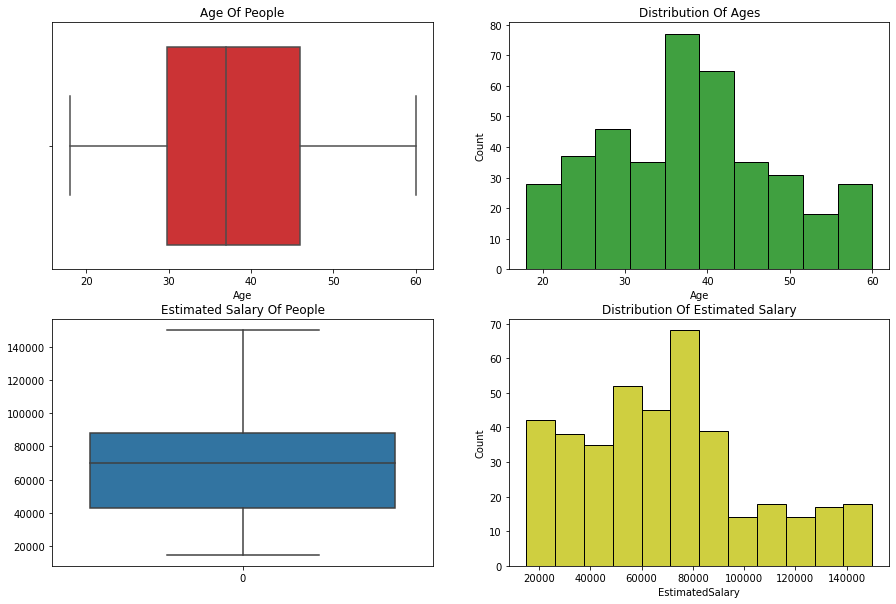

In [6]:
# Creating 4 plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# Age Boxplot
sns.boxplot(ax=axes[0,0],x= dataset['Age'], palette = "Set1")
axes[0,0].set_title('Age Of People')
# Age Histogram
sns.histplot(ax=axes[0,1],x='Age',data=dataset,color="g")
axes[0,1].set_title('Distribution Of Ages')

# EstimatedSalary Boxplot
sns.boxplot(ax=axes[1,0],data = dataset['EstimatedSalary'])
axes[1,0].set_title('Estimated Salary Of People')
# EstimatedSalary Histogram
sns.histplot(ax=axes[1,1],x='EstimatedSalary',data=dataset,color="y")
axes[1,1].set_title('Distribution Of Estimated Salary')

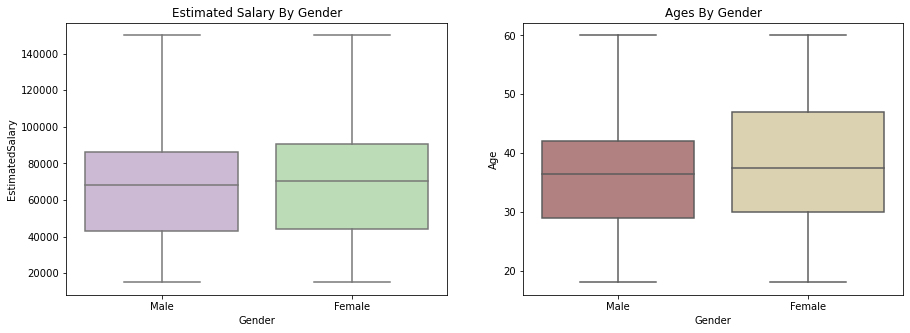

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax=axes[0],x=dataset['Gender'], y=dataset['EstimatedSalary'], palette="PRGn")
axes[0].set_title('Estimated Salary By Gender')

sns.boxplot(ax=axes[1],x=dataset['Gender'], y=dataset['Age'], palette="pink")
axes[1].set_title('Ages By Gender')
plt.show()

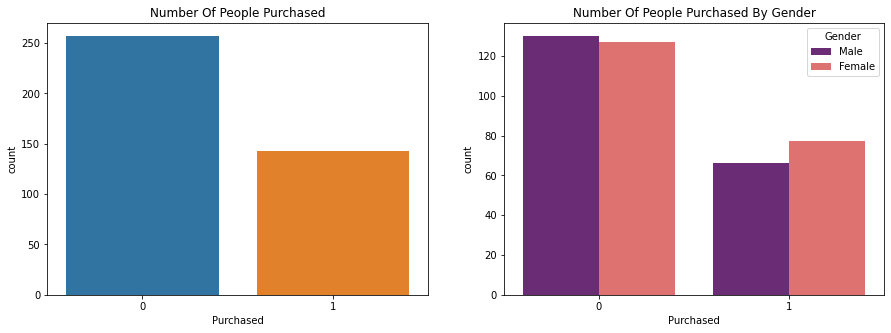

In [8]:
fig ,axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(ax=axes[0],x='Purchased',data=dataset)
axes[0].set_title('Number Of People Purchased')
sns.countplot(ax=axes[1],x='Purchased',hue='Gender',data=dataset,palette="magma")
axes[1].set_title('Number Of People Purchased By Gender')
plt.show()

In [9]:
dataset.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


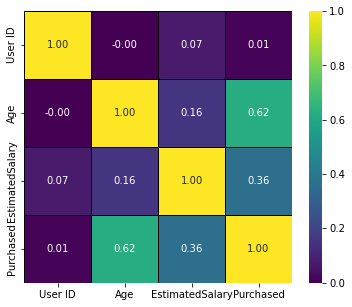

In [10]:
f,ax = plt.subplots(figsize=(6, 5))
#Heatmap for labels
sns.heatmap(dataset.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',cmap='viridis',ax=ax)
plt.show()

In [11]:
#preparing data
# Removing User ID column and its data
dataset.drop('User ID',axis = 1, inplace = True)
label = {'Male': 0 ,"Female" : 1}
dataset['Gender'].replace(label, inplace= True)

In [21]:
# set inputs and outputs
#Dataset without correct dependent variable values
X = dataset.drop('Purchased',axis = 1)     
#Dependent variable values
y = dataset['Purchased']
X, y

(     Gender  Age  EstimatedSalary
 0         0   19            19000
 1         0   35            20000
 2         1   26            43000
 3         1   27            57000
 4         0   19            76000
 ..      ...  ...              ...
 395       1   46            41000
 396       0   51            23000
 397       1   50            20000
 398       0   36            33000
 399       1   49            36000
 
 [400 rows x 3 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [27]:
# we have to scale the data for better result

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
data_scaled1 = pd.DataFrame(data_scaled)
data_scaled1.head()

,0,1,2
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data_scaled,y,test_size=0.20,random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression

# LR model
model = LogisticRegression(C=0.1,max_iter = 500)
# LR model training
model.fit(X_train,y_train)

# LR testing/prediction
y_pred = model.predict(X_test)

In [47]:
# y = B + W*x1...

print(f'Weight Coefficient : {model.coef_}')
print(f'Bias : {model.intercept_}')

Weight Coefficient : [[-0.06210386  1.39043467  0.79306064]]
Bias : [-0.8686142]


In [54]:
# Accuracy: The amount of correct classifications / the total amount of classifications.
# The train accuracy: The accuracy of a model on examples it was constructed on.
# The test accuracy is the accuracy of a model on examples it hasn't seen.
print(f'Test accuracy: {model.score(X_test,y_test)}')
print(f'Train accuracy: {model.score(X_train,y_train)}')

Test accuracy: 0.8625
Train accuracy: 0.8125


In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [56]:
from sklearn.metrics import confusion_matrix

df = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted Positive', 'Predicted Negative'], 
                  index=['Actual Positive', 'Actual Negative'])
df

,Predicted Positive,Predicted Negative
Actual Positive,50,2
Actual Negative,9,19


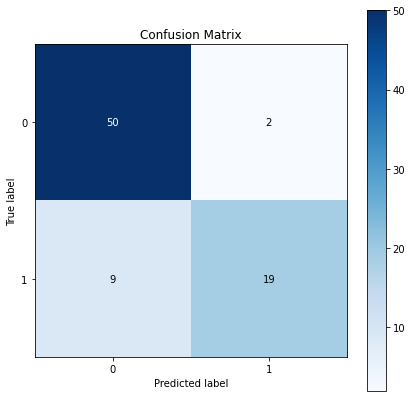

In [61]:
# We can visualize the confusion matrix
import scikitplot.metrics as splt

splt.plot_confusion_matrix(y_test,y_pred,figsize=(7,7))
plt.show()

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred, ))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Accuracy: 0.8625
Precision: 0.9047619047619048
Recall: 0.6785714285714286
F1 Score: 0.7755102040816326


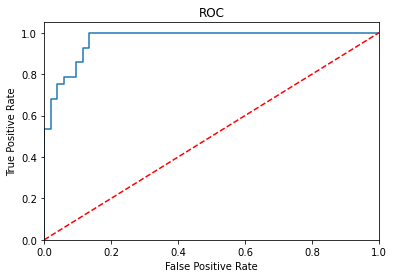

In [63]:
# Area Under Curve - AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.
model_roc_auc = roc_auc_score(y_test, model.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [78]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

clf = LogisticRegression()
model_res = clf.fit(X_train_res, y_train_res)

In [72]:
print(f'Test accuracy {model_res.score(X_test,y_test)}')

Test accuracy 0.9


In [74]:
print(f'Original: {X_train.shape}')
print(f'With SMOTE: {X_train_res.shape}')

Original: (320, 3)
With SMOTE: (410, 3)
